In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import warnings

In [2]:
warnings.filterwarnings('ignore')

### 1. Load Data

In [3]:
# Reading cleaned files
life_exp_df = pd.read_csv('../data/Milestone_1_cleaned_files/life_expectancy_clean.csv')
region_df =  pd.read_csv('../data/Milestone_1_cleaned_files/region_clean.csv')
income_df =  pd.read_csv('../data/Milestone_1_cleaned_files/income_clean.csv')
edu_df =  pd.read_csv('../data/Milestone_1_cleaned_files/edu_clean.csv')
crime_df =  pd.read_csv('../data/Milestone_1_cleaned_files/crime_clean.csv')
area_df =  pd.read_csv('../data/Milestone_1_cleaned_files/area_clean.csv')

Looking at the loaded data files

In [4]:
life_exp_df.head()

,State,LifeExp2018,LifeExp2010,MaleLifeExp,FemLifeExp
0,Alabama,75.4,75.4,72.6,78.1
1,Alaska,78.8,78.0,76.7,81.2
2,American_Samoa,74.8,74.0,73.0,77.0
3,Arizona,79.9,79.3,77.5,82.3
4,Arkansas,75.9,76.0,73.1,78.6


In [5]:
life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        57 non-null     object 
 1   LifeExp2018  56 non-null     float64
 2   LifeExp2010  57 non-null     float64
 3   MaleLifeExp  57 non-null     float64
 4   FemLifeExp   57 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.4+ KB


In [6]:
region_df.head()

,State,Abb,Region,Division
0,Alabama,AL,South,East South Central
1,Alaska,AK,West,Pacific
2,Arizona,AZ,West,Mountain
3,Arkansas,AR,South,West South Central
4,California,CA,West,Pacific


In [7]:
region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   State     50 non-null     object
 1   Abb       50 non-null     object
 2   Region    50 non-null     object
 3   Division  50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [8]:
income_df.head()

,State,Income2017,Income2016,Income2015,Income2014,Income2013,Income2012,Income2011,Income2010,Income2009,Income2008,Income2007
0,Alabama,48123,46257,44765,42830,42849,41574,41415,40474,40489,42666,40554
1,Alaska,73181,76440,73355,71583,72237,67712,67825,64576,66953,68460,64333
2,Arizona,56581,53558,51492,50068,48510,47826,46709,46789,48745,50958,49889
3,Arkansas,45869,45907,42798,44922,39376,39018,41302,38587,36538,39586,38134
4,California,71805,67739,64500,61933,60190,58328,57287,57708,58931,61021,59948


In [9]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       51 non-null     object
 1   Income2017  51 non-null     int64 
 2   Income2016  51 non-null     int64 
 3   Income2015  51 non-null     int64 
 4   Income2014  51 non-null     int64 
 5   Income2013  51 non-null     int64 
 6   Income2012  51 non-null     int64 
 7   Income2011  51 non-null     int64 
 8   Income2010  51 non-null     int64 
 9   Income2009  51 non-null     int64 
 10  Income2008  51 non-null     int64 
 11  Income2007  51 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 4.9+ KB


In [10]:
edu_df.head()

,State,HSGradPer,BADegPer,AdvDegPer
0,Alabama,85.3,24.5,9.1
1,Alaska,92.4,29.0,10.4
2,Arizona,82.1,28.4,10.7
3,Arkansas,85.6,22.0,7.9
4,California,82.5,32.6,12.2


In [11]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      51 non-null     object 
 1   HSGradPer  51 non-null     float64
 2   BADegPer   51 non-null     float64
 3   AdvDegPer  51 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


In [12]:
crime_df.head()

,State,PopTot,MurderNMTot,MurderTot,GunMurderTot,GunOwnPer,MurderNMRate,MurderRate,GunMurderRate
0,Alabama,4853875,348,NaN,NaN,48.9,7.2,NaN,NaN
1,Alaska,737709,59,57.0,39.0,61.7,8.0,7.7,5.3
2,Arizona,6817565,306,278.0,171.0,32.3,4.5,4.1,2.5
3,Arkansas,2977853,181,164.0,110.0,57.9,6.1,5.5,3.7
4,California,38993940,1861,1861.0,1275.0,20.1,4.8,4.8,3.3


In [13]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   PopTot         51 non-null     int64  
 2   MurderNMTot    51 non-null     int64  
 3   MurderTot      49 non-null     float64
 4   GunMurderTot   49 non-null     float64
 5   GunOwnPer      51 non-null     float64
 6   MurderNMRate   51 non-null     float64
 7   MurderRate     49 non-null     float64
 8   GunMurderRate  49 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 3.7+ KB


In [14]:
area_df.head()

,State,TotalSqMi,TotalKmQ,LandSqMi,LandKmQ,LandPer,WaterSqMi,WaterKmQ,WaterPer
0,Alabama,52420.07,135767,50645.33,131171,96.61,1774.74,4597,3.39
1,Alaska,665384.04,1723337,570640.95,1477953,85.76,94743.10,245384,14.24
2,Arizona,113990.30,295234,113594.08,294207,99.65,396.22,1026,0.35
3,Arkansas,53178.55,137732,52035.48,134771,97.85,1143.07,2961,2.15
4,California,163694.74,423967,155779.22,403466,95.16,7915.52,20501,4.84


In [15]:
area_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      50 non-null     object 
 1   TotalSqMi  50 non-null     float64
 2   TotalKmQ   50 non-null     int64  
 3   LandSqMi   50 non-null     float64
 4   LandKmQ    50 non-null     int64  
 5   LandPer    50 non-null     float64
 6   WaterSqMi  50 non-null     float64
 7   WaterKmQ   50 non-null     int64  
 8   WaterPer   50 non-null     float64
dtypes: float64(5), int64(3), object(1)
memory usage: 3.6+ KB


### 2. Data Exploration

In [16]:
# Merge all files on State column for data exploration and set 'State' as index
merged_data = reduce(lambda x,y: pd.merge(x,y, on='State', how='inner'), 
                     [life_exp_df, region_df, income_df,edu_df,crime_df,area_df])

merged_data.set_index('State')
merged_data.head()

,State,LifeExp2018,LifeExp2010,MaleLifeExp,FemLifeExp,Abb,Region,Division,Income2017,Income2016,...,MurderRate,GunMurderRate,TotalSqMi,TotalKmQ,LandSqMi,LandKmQ,LandPer,WaterSqMi,WaterKmQ,WaterPer
0,Alabama,75.4,75.4,72.6,78.1,AL,South,East South Central,48123,46257,...,NaN,NaN,52420.07,135767,50645.33,131171,96.61,1774.74,4597,3.39
1,Alaska,78.8,78.0,76.7,81.2,AK,West,Pacific,73181,76440,...,7.7,5.3,665384.04,1723337,570640.95,1477953,85.76,94743.10,245384,14.24
2,Arizona,79.9,79.3,77.5,82.3,AZ,West,Mountain,56581,53558,...,4.1,2.5,113990.30,295234,113594.08,294207,99.65,396.22,1026,0.35
3,Arkansas,75.9,76.0,73.1,78.6,AR,South,West South Central,45869,45907,...,5.5,3.7,53178.55,137732,52035.48,134771,97.85,1143.07,2961,2.15
4,California,81.6,80.6,79.4,83.8,CA,West,Pacific,71805,67739,...,4.8,3.3,163694.74,423967,155779.22,403466,95.16,7915.52,20501,4.84


In [17]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          50 non-null     object 
 1   LifeExp2018    50 non-null     float64
 2   LifeExp2010    50 non-null     float64
 3   MaleLifeExp    50 non-null     float64
 4   FemLifeExp     50 non-null     float64
 5   Abb            50 non-null     object 
 6   Region         50 non-null     object 
 7   Division       50 non-null     object 
 8   Income2017     50 non-null     int64  
 9   Income2016     50 non-null     int64  
 10  Income2015     50 non-null     int64  
 11  Income2014     50 non-null     int64  
 12  Income2013     50 non-null     int64  
 13  Income2012     50 non-null     int64  
 14  Income2011     50 non-null     int64  
 15  Income2010     50 non-null     int64  
 16  Income2009     50 non-null     int64  
 17  Income2008     50 non-null     int64  
 18  Income2007  

### In the Data Exploration Report a few questions can be answered as below:

#### 1. Which state has the highest life expectancy and which state the lowest?

In [18]:
merged_data['LifeExp2018'].describe()

count    50.000000
mean     78.698000
std       1.799262
min      74.800000
25%      77.850000
50%      79.100000
75%      79.900000
max      82.300000
Name: LifeExp2018, dtype: float64

In [19]:
print(merged_data['State'][merged_data['LifeExp2018'].argmax()],"has highest life expectancy.")
print(merged_data['State'][merged_data['LifeExp2018'].argmin()],"has lowest life expectancy.")

Hawaii has highest life expectancy.
West_Virginia has lowest life expectancy.


#### 2. What percent of the states have a life expectancy greater than 80 years?

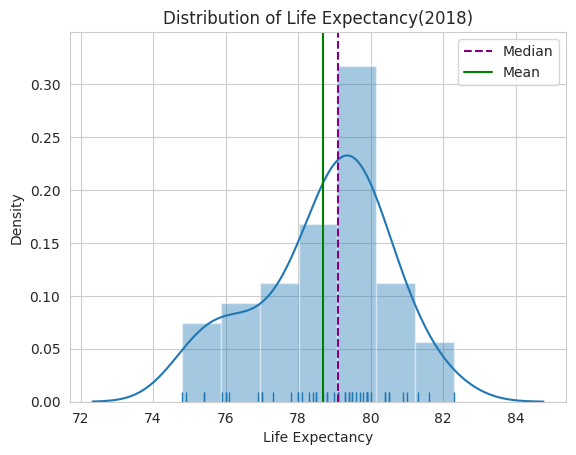

In [20]:
# Plotting distribution of life expectancy variable
sns.set_style('whitegrid')
sns.distplot(x =merged_data['LifeExp2018'],kde = True, rug = True)
plt.axvline(merged_data['LifeExp2018'].median(), color = 'purple', linestyle = '--',label = 'Median')
plt.axvline(merged_data['LifeExp2018'].mean(), color = 'green', label = 'Mean')
plt.xlabel('Life Expectancy')
plt.title('Distribution of Life Expectancy(2018)')
plt.legend()
plt.show()

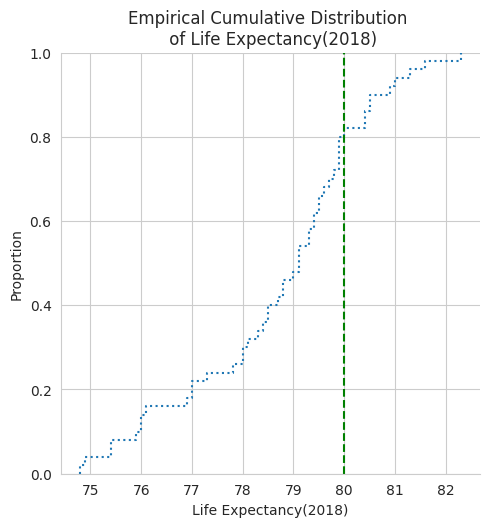

In [21]:
# Plot of the life empirical cumulative distribution function (ECDF) of life expectancy. The ECDF curve shows
# what percent of states have a life expectancy greater than 80 years

sns.displot(merged_data['LifeExp2018'],kind = 'ecdf', linestyle = ':')
plt.axvline(x = 80, color = 'green', linestyle = '--')
plt.xlabel('Life Expectancy(2018)')
plt.title('Empirical Cumulative Distribution \n of Life Expectancy(2018)')
plt.show()

The ECD plot shows 80 percent of states have a life expectancy greater than 80 years.

#### 3. Is life expectancy equally distributed across the different regions of the U.S.? Which region shows the highest variation (dispersion) in life expectancy?

In [22]:
# Life expectancy summary statistics, grouping the observations by region
life_exp_data = merged_data[['LifeExp2018','Region']]
life_exp_data.groupby('Region').describe()

LifeExp2018                                                    \
                    count       mean       std   min     25%    50%     75%   
Region                                                                        
North Central        12.0  78.783333  1.264072  76.9  77.825  79.20  79.450   
Northeast             9.0  79.911111  0.985450  78.3  79.500  79.90  80.500   
South                16.0  77.087500  1.750000  74.8  75.775  76.55  78.575   
West                 13.0  79.761538  1.218290  78.1  78.800  79.80  80.400   

                     
                max  
Region               
North Central  81.0  
Northeast      81.3  
South          80.0  
West           82.3

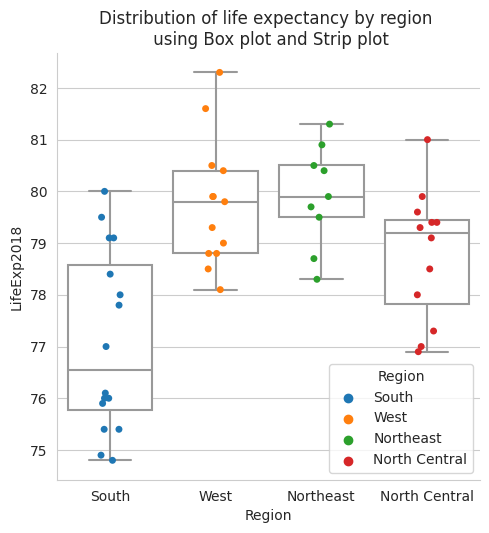

In [23]:
# Box plot,strip plot to show distribution by region

sns.catplot(x = 'Region',y = 'LifeExp2018', data = life_exp_data, kind = "box" ,color = 'w')
sns.stripplot(data=life_exp_data, x="Region", y="LifeExp2018", hue = 'Region')
plt.title("Distribution of life expectancy by region \n using Box plot and Strip plot")
plt.show()

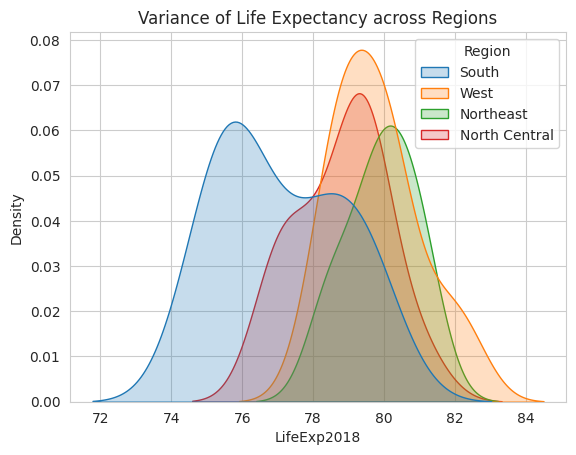

In [24]:
# KDE plot to show distribution by region

sns.kdeplot(
   data=life_exp_data, x="LifeExp2018", hue="Region",
   fill=True
)
plt.title("Variance of Life Expectancy across Regions")
plt.show()

All the plots (Box,Strip,KDE) show South has a bigger variation in Life Expectancy. The rest of the regions  show similar distribution range.

#### 4. Is educational level in the U.S. equally distributed among high school, bachelor’s, and advanced degrees? Does one of these levels show a greater spread across the states?

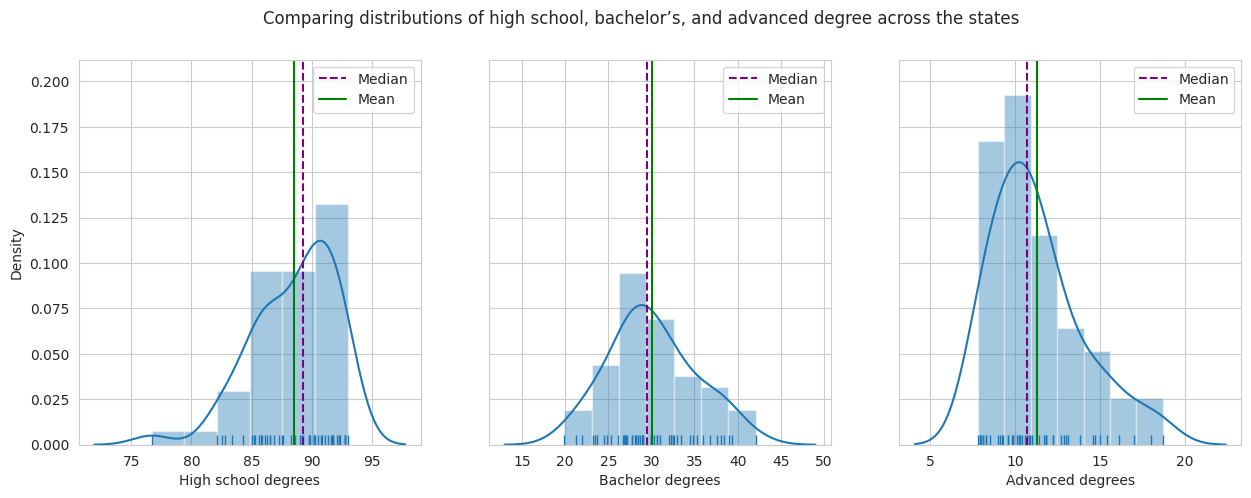

In [25]:
# Distribution of education variables 
fig, axes = plt.subplots(1,3, figsize=(15, 5), sharey=True)
fig.suptitle('Comparing distributions of high school, bachelor’s, and advanced degree across the states')
sns.distplot(ax=axes[0],x =merged_data['HSGradPer'],kde = True, rug = True)
axes[0].axvline(merged_data['HSGradPer'].median(), color = 'purple', linestyle = '--',label = 'Median')
axes[0].axvline(merged_data['HSGradPer'].mean(), color = 'green', label = 'Mean')
axes[0].set_xlabel('High school degrees')
axes[0].legend()
sns.distplot(ax=axes[1],x =merged_data['BADegPer'],kde = True, rug = True)
axes[1].axvline(merged_data['BADegPer'].median(), color = 'purple', linestyle = '--',label = 'Median')
axes[1].axvline(merged_data['BADegPer'].mean(), color = 'green', label = 'Mean')
axes[1].set_xlabel('Bachelor degrees')
axes[1].legend()
sns.distplot(ax=axes[2],x =merged_data['AdvDegPer'],kde = True, rug = True)
axes[2].axvline(merged_data['AdvDegPer'].median(), color = 'purple', linestyle = '--',label = 'Median')
axes[2].axvline(merged_data['AdvDegPer'].mean(), color = 'green', label = 'Mean')
axes[2].set_xlabel('Advanced degrees')
axes[2].legend()
plt.show()

The distribution for Bachelor degrees is normal, whereas High School degrees is left skewed and Advanced degrees is right skewed.

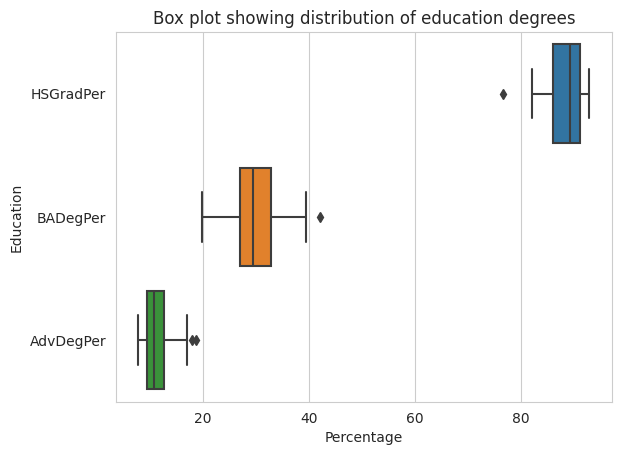

In [26]:
sns.boxplot(data=merged_data[["HSGradPer", "BADegPer","AdvDegPer"]], orient="h");
plt.xlabel("Percentage")
plt.ylabel("Education")
plt.title("Box plot showing distribution of education degrees")
plt.show()

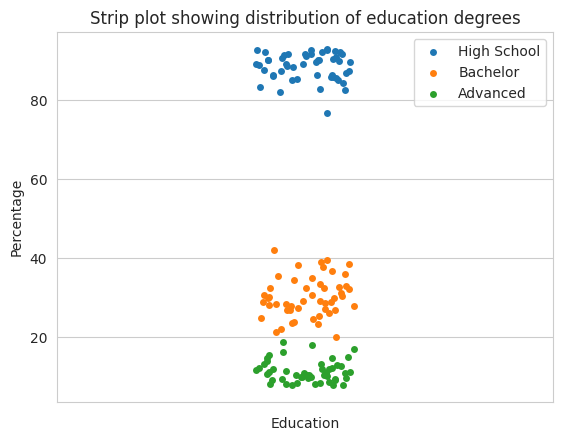

In [27]:
fig, ax = plt.subplots()
sns.stripplot(y= merged_data['HSGradPer'], ax=ax, label="High School")
sns.stripplot(y= merged_data['BADegPer'], ax=ax, label= "Bachelor")
sns.stripplot(y= merged_data['AdvDegPer'], ax=ax, label = "Advanced")
plt.ylabel("Percentage")
plt.xlabel("Education")
plt.title("Strip plot showing distribution of education degrees")
plt.show()

In [28]:
edu_data = merged_data[['HSGradPer','BADegPer','AdvDegPer']]
edu_data = edu_data.rename(columns={"HSGradPer": "High School", "BADegPer": "Bachelor","AdvDegPer":"Advanced"})

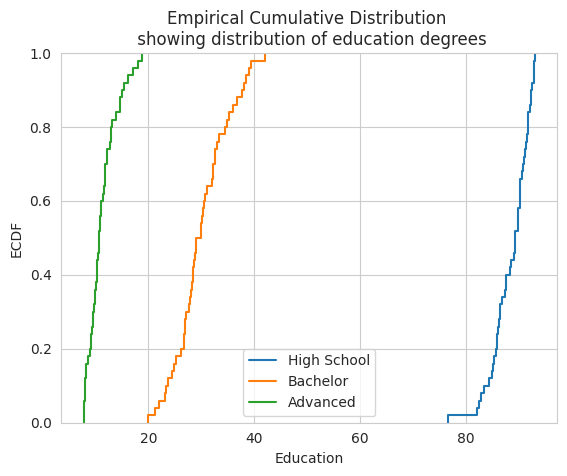

In [29]:
sns.ecdfplot(data=edu_data)
plt.xlabel("Education")
plt.ylabel("ECDF")
plt.title("Empirical Cumulative Distribution \n showing distribution of education degrees")
plt.show()

Box,Strip and ECD plot shows that Bachelor degree has the highest spread across all States